In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer #Chuyen doi van ban thanh vector so
from scipy.sparse import hstack #Gop cac ma tran thap
from sklearn.metrics import mean_squared_error


In [3]:
df_train = pd.read_csv('D:\\DataScience\\Data\\LLM_Classification_Finetuning\\train.csv')
df_test = pd.read_csv('D:\\DataScience\\Data\\LLM_Classification_Finetuning\\test.csv')

In [4]:
df_train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [6]:
df_test.head()

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


In [7]:
def winner(row):
    if row['winner_model_a']==1:
        return 0
    elif row['winner_model_b']==1:
        return 1
    else:
        return 2

In [8]:
df_train['lable']= df_train.apply(winner, axis=1)

In [9]:
df_train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,lable
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,2
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,1


In [10]:
y = df_train['lable']

In [11]:
df_train['combined_text']=df_train["prompt"] + " "+ df_train["response_a"] + " " + df_train["response_b"]
df_train['length']= df_train["response_a"].str.len() + df_train["response_b"].str.len()

In [12]:
df_test['combined_text']=df_test["prompt"] + " "+ df_test["response_a"] + " " + df_test["response_b"]
df_test['length']= df_test['length']= df_test["response_a"].str.len() + df_test["response_b"].str.len()

In [13]:
df_train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,lable,combined_text,length
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,0,"[""Is it morally right to try to have a certain...",5744
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,1,"[""What is the difference between marriage lice...",6763
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,2,"[""explain function calling. how would you call...",2756
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,0,"[""How can I create a test set for a very rare ...",4744
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,1,"[""What is the best way to travel from Tel-Aviv...",2072


In [14]:
X = df_train.drop(['model_a','model_b','winner_model_a','winner_model_b','winner_tie','lable','prompt','response_a','response_b'], axis=1)

In [15]:
X.head()

,id,combined_text,length
0,30192,"[""Is it morally right to try to have a certain...",5744
1,53567,"[""What is the difference between marriage lice...",6763
2,65089,"[""explain function calling. how would you call...",2756
3,96401,"[""How can I create a test set for a very rare ...",4744
4,198779,"[""What is the best way to travel from Tel-Aviv...",2072


In [16]:
X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
tf=TfidfVectorizer(max_features=5000)
X_train_text=tf.fit_transform(X_train['combined_text'])
X_val_text=tf.transform(X_val['combined_text'])

In [18]:
X_train_text.shape

(45981, 5000)

In [19]:
X_train_text.shape

(45981, 5000)

In [20]:
X_train['length'].shape

(45981,)

In [21]:
X_train2D=X_train['length'].values.reshape(-1,1)
X_val2D=X_val['length'].values.reshape(-1,1)

In [22]:
X_train2D.shape

(45981, 1)

In [23]:
X_val2D.shape

(11496, 1)

In [24]:
train_futures = hstack([X_train_text, X_train2D])
val_futures = hstack([X_val_text, X_val2D])

In [25]:
rf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,max_depth=20, random_state=42)
rf.fit(train_futures, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [26]:
y_pred=rf.predict(val_futures)
T=pd.DataFrame({'Thuc te':y_val, 'Du doan':y_pred})
T.head()

,Thuc te,Du doan
37379,0,0
644,0,0
48496,2,1
12603,0,0
16697,0,2


In [27]:
score=rf.score(val_futures, y_val)
score

0.3923973556019485

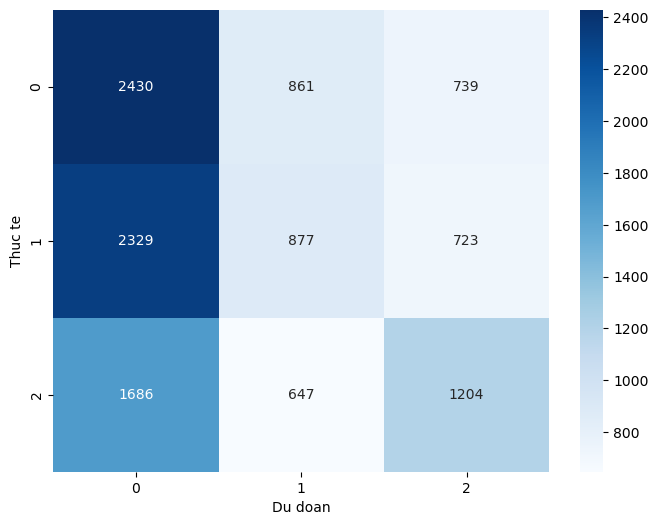

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(T['Thuc te'], T['Du doan']), annot=True, fmt='d', cmap='Blues')
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(n_jobs=-1,class_weight='balanced',max_iter=2000, random_state=42)

In [30]:
lr.fit(train_futures, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, n_jobs=-1,
                   random_state=42)

In [31]:
score_lr=lr.score(val_futures, y_val)
score_lr

0.36786708420320113

In [33]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(n_estimators=1000, max_depth=20, random_state=42)
lgbm.fit(train_futures, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.325982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 867458
[LightGBM] [Info] Number of data points in the train set: 45981, number of used features: 4994
[LightGBM] [Info] Start training from score -1.053517
[LightGBM] [Info] Start training from score -1.073104
[LightGBM] [Info] Start training from score -1.173298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=20, n_estimators=1000, random_state=42)

In [35]:
score_lgbm=lgbm.score(val_futures, y_val)
score_lgbm

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\lightgbm\basic.py:1238: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


0.3790883785664579